Adrien Forestier _ Maxence Ferreira _  Victoria Garnil _ DIA3  
Python for Data Analysis 2022/2023  
FINAL PROJECT  
#  **How to predict drug use, and more specifically Cannabis use, according to different parameters (personal and environmental) ?**


# Data and library import

In [ ]:
#Data
import pandas as pd
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler

#modeling
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score,HalvingGridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.linear_model import LogisticRegression, RidgeClassifier,Lasso
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, f1_score

#Linear Discriminant Analysis:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from collections import defaultdict
import importlib
import sklearn

In [ ]:
#to see all columns
pd.set_option('display.max_columns', None)

In [ ]:
#data import
df=pd.read_csv('drug_consumption.data')

In [ ]:
df.head()

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2.1,CL6,CL0.1,CL5.1,CL0.2,CL0.3,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


# FIRST PART : DATA PRE-PROCESSING

## 1) Encoding

In [ ]:
# Rename columns
df.columns=['ID',
            'Age',
            'Gender',
            'Education Level',
            'Country',
            'Ethnicity',
            'Nscore',
            'Escore',
            'Oscore',
            'Ascore',
            'Cscore',
            'Impulsiveness',
            'Sensation Seing',
            'Alcohol',
            'Amphetamines',
            'Amyl nitrite',
            'Benzodiazepine',
            'Caffeine',
            'Cannabis',
            'Chocolate',
            'Cocaine',
            'Crack',
            'Ecstasy',
            'Heroin',
            'Ketamine',
            'Legal highs',
            'LSD',
            'Methadone',
            'Magic mushrooms',
            'Nicotine',
            'Fictitious drug Semeron',
            'Volatile substance abuse']

In [ ]:
# Replacing non-numeric values
df.replace(["CL0","CL1","CL2","CL3","CL4","CL5","CL6"],[0,1,2,3,4,5,6],inplace=True)

In [ ]:
df.head()

,ID,Age,Gender,Education Level,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,Sensation Seing,Alcohol,Amphetamines,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Magic mushrooms,Nicotine,Fictitious drug Semeron,Volatile substance abuse
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,6,0,0


## 2) Cleaning

In [ ]:
# Removing the "Fictitious drug Semeron" column  and individuals who used this fictitious drug (biased individuals)
# Removing the "ID" column
df = df.drop(df[df['Fictitious drug Semeron'] != 0].index)
df.drop(['ID','Fictitious drug Semeron'], inplace=True, axis=1)

In [ ]:
df.head()

,Age,Gender,Education Level,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,Sensation Seing,Alcohol,Amphetamines,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Magic mushrooms,Nicotine,Volatile substance abuse
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,6,0


## 3) Imputation

In [ ]:
# Check for missing values to do the imputation
df.isna().sum().sum()

0

No missing value -> no need for imputation

# SECOND PART : DATA VISUALIZATION

## 1) Better understanding of each variable : distribution

### a) Distribution of personal and external variables

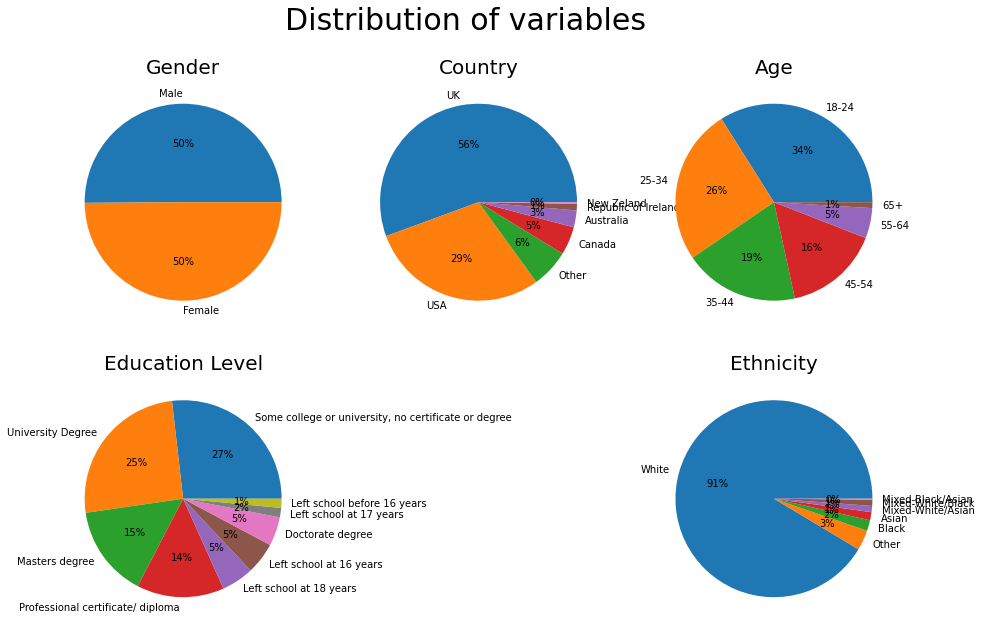

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,3,1) # we use a counter (3rd parameter) 
plt.pie(df['Gender'].value_counts(),autopct='%1.0f%%',labels=['Male','Female'])
plt.title("Gender",size=20)

plt.subplot(2,3,2)
plt.pie(df['Country'].value_counts(),autopct='%1.0f%%', labels=['UK', 'USA', 'Other', 'Canada', 'Australia', 'Republic of Ireland', 'New Zeland'])
plt.title("Country",size=20)



plt.subplot(2,3,3)
plt.pie(df['Age'].value_counts(),autopct='%1.0f%%',labels=['18-24','25-34','35-44','45-54','55-64','65+'])
plt.title("Age",size=20)


plt.subplot(2,3,4)
plt.pie(df['Education Level'].value_counts(),autopct='%1.0f%%', labels=['Some college or university, no certificate or degree', 'University Degree', 'Masters degree', 'Professional certificate/ diploma', 'Left school at 18 years', 'Left school at 16 years', 'Doctorate degree', 'Left school at 17 years', 'Left school before 16 years'])
plt.title("Education Level",size=20)

plt.subplot(2,3,6)
plt.pie(df['Ethnicity'].value_counts(),autopct='%1.0f%%', labels=['White', 'Other', 'Black', 'Asian', 'Mixed-White/Asian', 'Mixed-White/Black', 'Mixed-Black/Asian'])
plt.title("Ethnicity",size=20)

plt.suptitle("Distribution of variables",fontsize=30)
plt.show()

### b) Personality traits and drug use

In [ ]:
values_Cscore = {
 -3.46436 : 17,
 -3.15735 : 19, 
 -2.90161 : 20,  
 -2.72827 : 21, 
 -2.57309 : 22,
 -2.42317 : 23,
 -2.30408 : 24,
 -2.18109 : 25,
 -2.04506 : 26,
 -1.92173 : 27,
 -1.78169 : 28,
 -1.64101 : 29,
 -1.51840 : 30,
 -1.38502 : 31,
 -1.25773 : 32,
 -1.13788 : 33,
 -1.01450 : 34,
 -0.89891 : 35,
 -0.78155 : 36,
 -0.65253 : 37,
 -0.52745 : 38,
 -0.40581 : 39,
 -0.27607 : 40,
 -0.14277 : 41,
 -0.00665 : 42,
 0.12331 : 43,
 0.25953 : 44,
 0.41594 : 45,
 0.58489 : 46,
 0.7583 : 47,
 0.93949 : 48,
 1.13407 : 49,
 1.30612 : 50,
 1.46191 : 51,
 1.63088 : 52,
 1.81175 : 53,
 2.04506 : 54,
 2.33337 : 55,
 2.63199 : 56,
 3.00537 : 57,
 3.46436 : 59
 }

values_Ascore = {
-3.46436:12,
 -3.15735:16,  
 -3.00537:18,
 -2.90161:23,
 -2.78793:24,
 -2.70172:25,
 -2.53830:26,
 -2.35413:27,
 -2.2184:28,
 -2.07848:29,
 -1.92595:30,
 -1.77200:31,
 -1.62090:32,
 -1.47955:33,
 -1.34289:34,
 -1.21213:35,
 -1.07533:36,
 -0.91699:37,
 -0.76096:38,
 -0.60633:39,
 -0.45321:40,
 -0.30172:41,
 -0.15487:42,
 -0.01729:43,
 0.13136:44,
 0.28783:45,
 0.43852:46,
 0.59042:47,
 0.76096:48,
 0.94156:49,
 1.11406:50,
 1.2861:51,
 1.45039:52,
 1.61108:53,
 1.81866:54,
 2.03972:55,
 2.23427:56,
 2.46262:57,
 2.75696:58,
 3.15735:59,
 3.46436:60}

values_Oscore = {
 -3.27393:24,
 -2.85950:26,
 -2.63199:28,
 -2.39883:29,
 -2.21069:30,
 -2.09015:31,
 -1.97495:32,
 -1.82919:33,
 -1.68062:34,
 -1.55521:35,
 -1.42424:36,
 -1.27553:37,
 -1.11902:38,
 -0.97631:39,
 -2.63199:40,
 -0.71727:41,
 -0.58331:42,
 -0.45174:43,
 -0.31776:44,
 -0.17779:45,
 -0.01928:46,
 0.14143:47,
 0.29338:48,
 0.44585:49,
 0.58331:50,
 0.72330:51,
 0.88309:52,
 1.06238:53,
 1.24033:54,
 1.43533:55,
 1.65653:56,
 1.88511:57,
 2.15324:58,
 2.44904:59,
 2.90161:60
 }

values_Escore={
 -3.27393:16,
 -3.00537:18,
 -2.72827:19,
 -2.53830:20,
 -2.44904:21,
 -2.32338:22,
 -2.21069:23,
 -2.11437:24,
 -2.03972:25,
 -1.92173:26,
 -1.76250:27,
 -1.63340:28,
 -1.50796:29,
 -1.37639:30,
 -1.23177:31,
 -1.09207:32,
 -0.94779:33,
 -0.80615:34,
 -0.69509:35,
 -0.57545:36,
 -0.43999:37,
 -0.30033:38,
 -0.15487:39,
 0.00332:40,
 0.16767:41,
 0.32197:42,
 0.47617:43,
 0.63779:44,
 0.80523:45,
 0.96248:46,
 1.11406:47,
 1.28610:48,
 1.45421:49,
 1.58487:50,
 1.74091:51,
 1.93886:52,
 2.12700:53,
 2.32338:54,
 2.57309:55,
 2.85950:56,
 3.00537:58,
 3.27393:59
 }

values_Nscore = {
 -3.46436:12,
 -3.15735:13,
 -2.75696:14,
 -2.52197:15,  
 -2.42317:16,
 -2.34360:17,
 -2.21844:18,
 -2.05048:19,
 -1.86962:20,
 -1.69163:21,
 -1.55078:22,
 -1.43907:23, 
 -1.32828:24,
 -1.19430:25,
 -1.05308:26,
 -0.92104:27,
 -0.79151:28,
 -0.67825:29,
 -0.58016:30,
 -0.46725:31,
 -0.34799:32,
 -0.24649:33,
 -0.14882:34,
 -0.05188:35,
 0.04257:36,
 0.13606:37,
 0.22393:38,
 0.31287:39,
 0.41667:40,
 0.52135:41,
 0.62967:42,
 0.73545:43,
 0.82562:44,
 0.91093:45,
 1.02119:46,
 1.13281:47,
 1.23461:48,
 1.37297:49,
 1.49158:50,
 1.60383:51,
 1.72012:52,
 1.83990:53,
 1.98437:54,
 2.12700:55,
 2.28554:56,
 2.46262:57,
 2.61139:58,
 2.82196:59,
 3.27393:60
}

In [ ]:
df_Cannabis1 = df[df["Cannabis"]>2]
df_Cannabis1 = df_Cannabis1[["Nscore","Oscore", "Escore","Ascore","Cscore"]]
df_Ecstasy = df[df["Ecstasy"]>2]
df_Ecstasy = df_Ecstasy[["Nscore","Oscore", "Escore","Ascore","Cscore"]]
df_Crack = df[df["Crack"]>2]
df_Crack = df_Crack[["Nscore","Oscore", "Escore","Ascore","Cscore"]]
df_Cannabis1["Cscore"]=df_Cannabis1.Cscore.map(values_Cscore)
df_Cannabis1["Oscore"]=df_Cannabis1.Oscore.map(values_Oscore)
df_Cannabis1["Ascore"]=df_Cannabis1.Ascore.map(values_Ascore)
df_Cannabis1["Escore"]=df_Cannabis1.Escore.map(values_Escore)
df_Cannabis1["Nscore"]=df_Cannabis1.Nscore.map(values_Nscore)
df_Ecstasy["Cscore"]=df_Ecstasy.Cscore.map(values_Cscore)
df_Ecstasy["Oscore"]=df_Ecstasy.Oscore.map(values_Oscore)
df_Ecstasy["Ascore"]=df_Ecstasy.Ascore.map(values_Ascore)
df_Ecstasy["Escore"]=df_Ecstasy.Escore.map(values_Escore)
df_Ecstasy["Nscore"]=df_Ecstasy.Nscore.map(values_Nscore)
df_Crack["Cscore"]=df_Crack.Cscore.map(values_Cscore)
df_Crack["Oscore"]=df_Crack.Oscore.map(values_Oscore)
df_Crack["Ascore"]=df_Crack.Ascore.map(values_Ascore)
df_Crack["Escore"]=df_Crack.Escore.map(values_Escore)
df_Crack["Nscore"]=df_Crack.Nscore.map(values_Nscore)

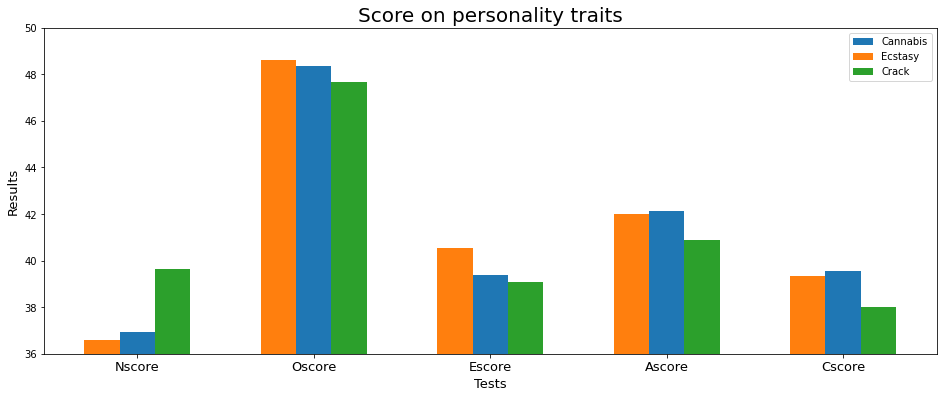

In [ ]:
plt.figure(figsize=(16,6))
x=["Nscore","Oscore","Escore","Ascore","Cscore"]
width=0.2
X_axis = np.arange(len(x))
plt.bar(X_axis,df_Cannabis1.mean(),width=width, label='Cannabis')
plt.bar(X_axis-.2,df_Ecstasy.mean(),width=width,label='Ecstasy')
plt.bar(X_axis+.2,df_Crack.mean(),width=width,label='Crack')
plt.xticks(X_axis,x, fontsize=13)
plt.xlabel("Tests",fontsize=13)
plt.ylabel("Results",fontsize=13)
plt.ylim([36,50])
plt.title("Score on personality traits",fontsize=20)
plt.legend()
plt.show()

Here, Crack causes strong neuroticism.
A Crack user is therefore more likely to have negative emotions and anxiety than a user of ectasy for example.  
Also, the users of these 3 drugs are very open to experience.


## 2) Frequency of drug consumption

Frequency of drug consumption by gender according to levels

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness',
       'Sensation Seing', 'Alcohol', 'Amphetamines', 'Amyl nitrite',
       'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal highs', 'LSD',
       'Methadone', 'Magic mushrooms', 'Nicotine', 'Volatile substance abuse'],
      dtype='object')

In [ ]:
drugs = ['Alcohol', 'Amphetamines', 'Amyl nitrite',
       'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal highs', 'LSD',
       'Methadone', 'Magic mushrooms', 'Nicotine', 'Volatile substance abuse']

#by gender
drugs_gender=df[drugs+["Gender"]]
drugs_gender=round(drugs_gender.groupby(["Gender"]).mean())
display(drugs_gender)

,Alcohol,Amphetamines,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Magic mushrooms,Nicotine,Volatile substance abuse
Gender,,,,,,,,,,,,,,,,,,
-0.48246,5.0,2.0,1.0,2.0,5.0,4.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,1.0
0.48246,5.0,1.0,0.0,1.0,5.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0


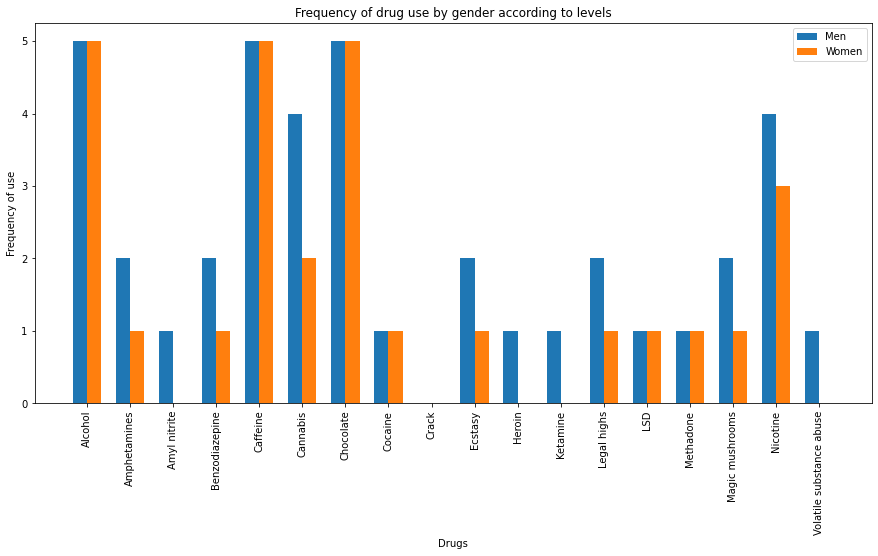

In [ ]:
# Graphical representation

width= 0.33
x_indexes=np.arange(len(list(drugs_gender.columns)))
x_names=drugs

plt.figure(figsize=(15, 7))
plt.bar(x_indexes-width/2 ,drugs_gender.loc[-0.48246],width=width, label='Men')
plt.bar(x_indexes+width/2 ,drugs_gender.loc[0.48246],width=width, label='Women')

plt.xlabel("Drugs")
plt.ylabel("Frequency of use")
plt.xticks(x_indexes, x_names,rotation=90)
plt.legend()

plt.title("Frequency of drug use by gender according to levels")
plt.show()

*   Men tend to be more drug users than women.The frequency of use is similar between the two genders when it comes to accessible addictions such as nicotine, chocolate or alcohol. 
*   Ectasy, Crack, Amyl Nitrite, Heroin and Ketamine are very little used drugs in our population. If we want to focus on the use of only one drug, we cannot select these, we would risk underfitting.





## 3) Drugs users vs non-user   
It is considered that an individual does not consume this drug if he has a frequency of consumption equal to 0 (Never Used), 1 (Used over a Decade Ago) or 2 (Used in Last Decade).
The new dataset with the references "user" and "non-user" will be called *df_user*.

### a) Drug and non-drug users by age

In [ ]:
# Add a column for each drug which contains the information that an individual is using that drug or not
drugs_user= ['Alcohol_user', 'Amphetamines_user', 'Amyl nitrite_user',
       'Benzodiazepine_user', 'Caffeine_user', 'Cannabis_user', 'Chocolate_user', 'Cocaine_user',
       'Crack_user', 'Ecstasy_user', 'Heroin_user', 'Ketamine_user', 'Legal highs_user', 'LSD_user',
       'Methadone_user', 'Magic mushrooms_user', 'Nicotine_user', 'Volatile substance abuse_user']

df_user = df.copy()

for i in range(len(drugs)):
    df_user.loc[((df_user[drugs[i]]==0) | (df_user[drugs[i]]==1) | (df_user[drugs[i]]==2)),drugs_user[i]] = 'Non-user'
    df_user.loc[((df_user[drugs[i]]==3) | (df_user[drugs[i]]==4) | (df_user[drugs[i]]==5) | (df_user[drugs[i]]==6)),drugs_user[i]]="User"

In [ ]:
df_user.head()

,Age,Gender,Education Level,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsiveness,Sensation Seing,Alcohol,Amphetamines,Amyl nitrite,Benzodiazepine,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Magic mushrooms,Nicotine,Volatile substance abuse,Alcohol_user,Amphetamines_user,Amyl nitrite_user,Benzodiazepine_user,Caffeine_user,Cannabis_user,Chocolate_user,Cocaine_user,Crack_user,Ecstasy_user,Heroin_user,Ketamine_user,Legal highs_user,LSD_user,Methadone_user,Magic mushrooms_user,Nicotine_user,Volatile substance abuse_user
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,User,Non-user,Non-user,Non-user,User,User,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,User,Non-user
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,User,Non-user,Non-user,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,6,0,4,0,0,0,0,0,0,0,0,0,6,0,Non-user,Non-user,Non-user,Non-user,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user


In [ ]:
drugs_user_age=df_user[drugs_user+["Age"]]
drugs_user_age

,Alcohol_user,Amphetamines_user,Amyl nitrite_user,Benzodiazepine_user,Caffeine_user,Cannabis_user,Chocolate_user,Cocaine_user,Crack_user,Ecstasy_user,Heroin_user,Ketamine_user,Legal highs_user,LSD_user,Methadone_user,Magic mushrooms_user,Nicotine_user,Volatile substance abuse_user,Age
0,User,Non-user,Non-user,Non-user,User,User,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,User,Non-user,-0.07854
1,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,0.49788
2,User,Non-user,Non-user,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,-0.95197
3,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,0.49788
4,Non-user,Non-user,Non-user,Non-user,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,2.59171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user,Non-user,User,-0.95197
1880,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,User,User,User,Non-user,-0.95197
1881,User,User,User,User,User,User,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,-0.07854
1882,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,User,Non-user,Non-user,User,User,Non-user,User,User,Non-user,-0.95197


In [ ]:
# Users by drug type according to the age
user_18_24=drugs_user_age[drugs_user_age["Age"]==-0.95197].drop(labels="Age", axis=1)
user_25_34=drugs_user_age[drugs_user_age["Age"]==-0.07854].drop(labels="Age", axis=1)
user_35_44=drugs_user_age[drugs_user_age["Age"]==0.49788].drop(labels="Age", axis=1)
user_45_54=drugs_user_age[drugs_user_age["Age"]==1.09449].drop(labels="Age", axis=1)
user_55_64=drugs_user_age[drugs_user_age["Age"]==1.82213].drop(labels="Age", axis=1)
user_65=drugs_user_age[drugs_user_age["Age"]==2.59171].drop(labels="Age", axis=1)

In [ ]:
def non_user_count(user_age):
  nb_non_user=[]

  for col in user_age:
    x = user_age[col].value_counts()["Non-user"]
    nb_non_user.append(x)
  return nb_non_user

In [ ]:
def user_count(user_age):
  nb_user=[]

  for col in user_age:
    x = user_age[col].value_counts()["User"]
    nb_user.append(x)
  return nb_user

In [ ]:
def user_count_percent(user_age):
  percent_user=[]

  for col in user_age:
    x = (user_age[col].value_counts()["User"])/user_age.shape[0]
    percent_user.append(x*100)
  return percent_user

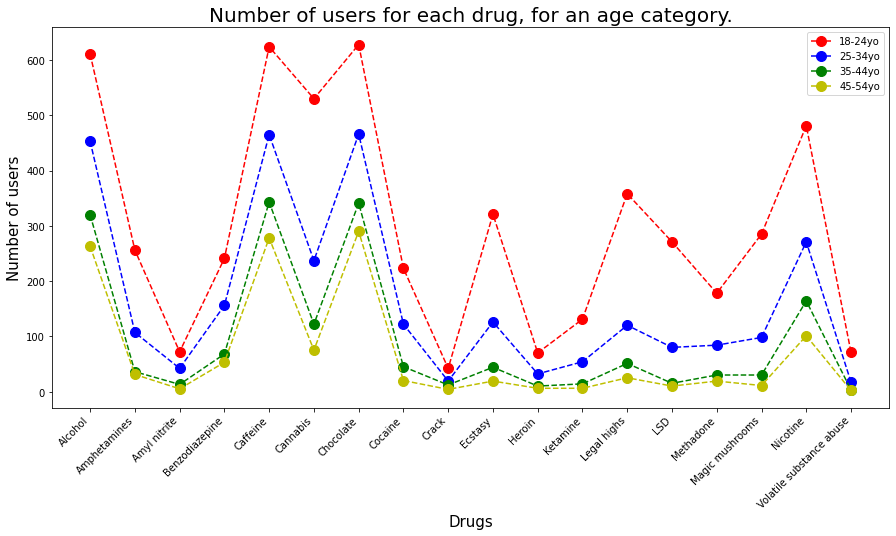

In [ ]:
# Number of users for each drug, for an age category.

x=drugs

#x_indexes=np.arange(len(x))
#x_names=['External causes', 'Railway infrastructure', 'Rolling stock','Station management and reuse of material','Passenger traffic']

plt.figure(figsize=(15, 7))

plt.plot(x,user_count(user_18_24),color='r', linestyle='--', marker='.',markersize=20,label='18-24yo')
plt.plot(x, user_count(user_25_34),color='b', linestyle='--', marker='.',markersize=20,label='25-34yo')
plt.plot(x, user_count(user_35_44),color='g', linestyle='--', marker='.',markersize=20,label='35-44yo')
plt.plot(x, user_count(user_45_54),color='y', linestyle='--', marker='.',markersize=20,label='45-54yo')
#plt.plot(x, user_count(user_55_64),color='pink', linestyle='--', marker='.',markersize=20,label='55-64yo')
#plt.plot(x, user_count(user_65),color='black', linestyle='--', marker='.',markersize=20,label='+65yo')

#plt.xticks(x_indexes, x_names,rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.title("Number of users for each drug, for an age category.",fontsize=20)
plt.xlabel("Drugs",fontsize=15)
plt.ylabel("Number of users",fontsize=15)
plt.legend()


*   Cannabis use among 18-24 year olds is very high.
*   The graph is not very representative of reality because the proportion of individuals is not the same for each age category. Thus, as there are more people aged 18-24, the number of young people aged 18-24 who use drugs is necessarily greater. 
*   We can try to visualise the percentages and not the number of individuals. 



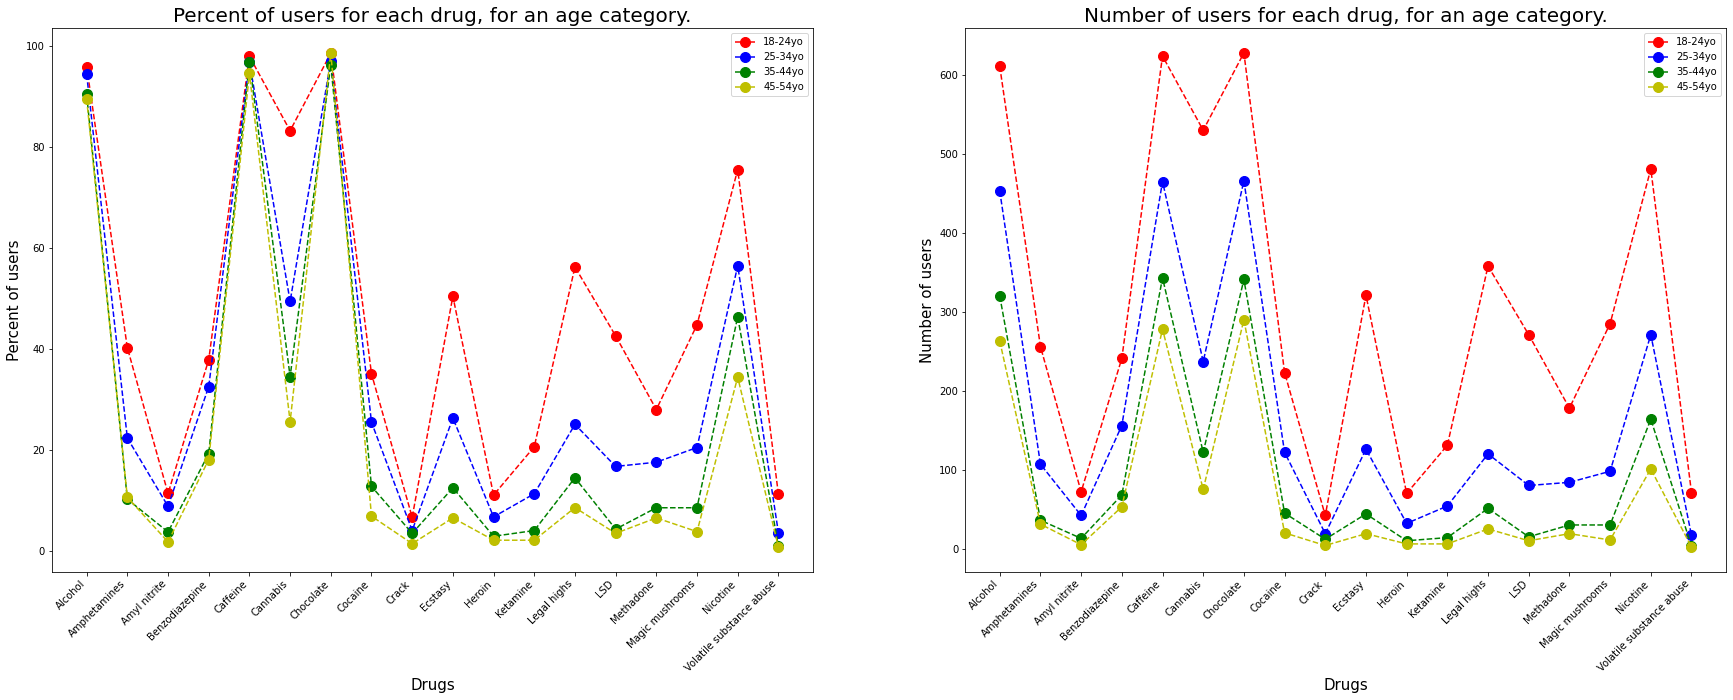

In [ ]:
# Percent of users for each drug, for an age category.

x=drugs
fig = plt.figure(figsize=(30,10))
plt.subplot(1,2,1)

plt.plot(x,user_count_percent(user_18_24),color='r', linestyle='--', marker='.',markersize=20,label='18-24yo')
plt.plot(x, user_count_percent(user_25_34),color='b', linestyle='--', marker='.',markersize=20,label='25-34yo')
plt.plot(x, user_count_percent(user_35_44),color='g', linestyle='--', marker='.',markersize=20,label='35-44yo')
plt.plot(x, user_count_percent(user_45_54),color='y', linestyle='--', marker='.',markersize=20,label='45-54yo')
#plt.plot(x, user_count_percent(user_55_64),color='pink', linestyle='--', marker='.',markersize=20,label='55-64yo')
#plt.plot(x, user_count_percent(user_65),color='black', linestyle='--', marker='.',markersize=20,label='+65yo')

#plt.xticks(x_indexes, x_names,rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.title("Percent of users for each drug, for an age category.",fontsize=20)
plt.xlabel("Drugs",fontsize=15)
plt.ylabel("Percent of users",fontsize=15)
plt.legend()

plt.subplot(1,2,2)

plt.plot(x,user_count(user_18_24),color='r', linestyle='--', marker='.',markersize=20,label='18-24yo')
plt.plot(x, user_count(user_25_34),color='b', linestyle='--', marker='.',markersize=20,label='25-34yo')
plt.plot(x, user_count(user_35_44),color='g', linestyle='--', marker='.',markersize=20,label='35-44yo')
plt.plot(x, user_count(user_45_54),color='y', linestyle='--', marker='.',markersize=20,label='45-54yo')
#plt.plot(x, user_count(user_55_64),color='pink', linestyle='--', marker='.',markersize=20,label='55-64yo')
#plt.plot(x, user_count(user_65),color='black', linestyle='--', marker='.',markersize=20,label='+65yo')

#plt.xticks(x_indexes, x_names,rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')
plt.title("Number of users for each drug, for an age category.",fontsize=20)
plt.xlabel("Drugs",fontsize=15)
plt.ylabel("Number of users",fontsize=15)
plt.legend()

plt.show()



*   We can see that our graph has changed after switching to percentages. 
*   However, as we only have a very small proportion of elderly people, the proportions are skewed. 
*   Some of the percentages for older people are very high when very few older people are involved.


### b) Drug users and non-drug users by drug

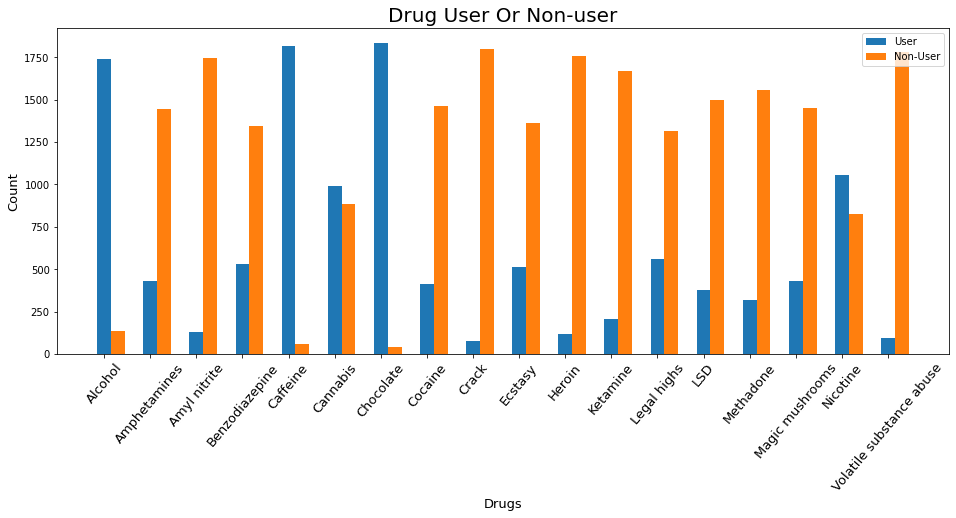

In [ ]:
plt.figure(figsize=(16,6))

width= 0.3
x_indexes=np.arange(len(list(df_user[drugs_user].columns)))
x_names=drugs_user

plt.bar(x_indexes+0,user_count(df_user[drugs_user]),width=width,label ='User')
plt.bar(x_indexes+.30,non_user_count(df_user[drugs_user]),width=width,label ='Non-User')
plt.xticks(x_indexes,drugs,rotation=50,fontsize=13)
plt.ylabel("Count",fontsize=13)
plt.xlabel("Drugs",fontsize=13)
plt.title("Drug User Or Non-user",fontsize=20)
plt.legend()

We are looking for a drug with a uniform distribution between drug users and non-drug users. Here it can be seen that cannabis is the drug that best meets this criterion.

### c) Confirmation of the selection of the drug to be focused on

In [ ]:
interesting_drugs = ['Amphetamines', 'Amyl nitrite',
       'Benzodiazepine', 'Cannabis', 'Cocaine',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal highs', 'LSD',
       'Methadone', 'Magic mushrooms', 'Volatile substance abuse']

most_used=df[interesting_drugs].sum().sort_values(ascending=False).head(1)
most_used

Cannabis    5594
dtype: int64

We have seen that the distribution between cannabis users and non-users is equivalent. Moreover, we notice here that the one with the most users is also Cannabis. Cannabis seems to be the best drug to test in our machine learning models.  
So, we choose to focus on Cannabis consumption, which has enough consumers to be interesting to predict.

**We choose to focus on Cannabis consumption, which has enough consumers to be interesting to predict.**
## 4) Visualisation of correlation between variables

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness',
       'Sensation Seing', 'Alcohol', 'Amphetamines', 'Amyl nitrite',
       'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal highs', 'LSD',
       'Methadone', 'Magic mushrooms', 'Nicotine', 'Volatile substance abuse'],
      dtype='object')

In [ ]:
df_Cannabis=df[['Age', 'Gender', 'Education Level', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsiveness',
       'Sensation Seing', 'Cannabis']]

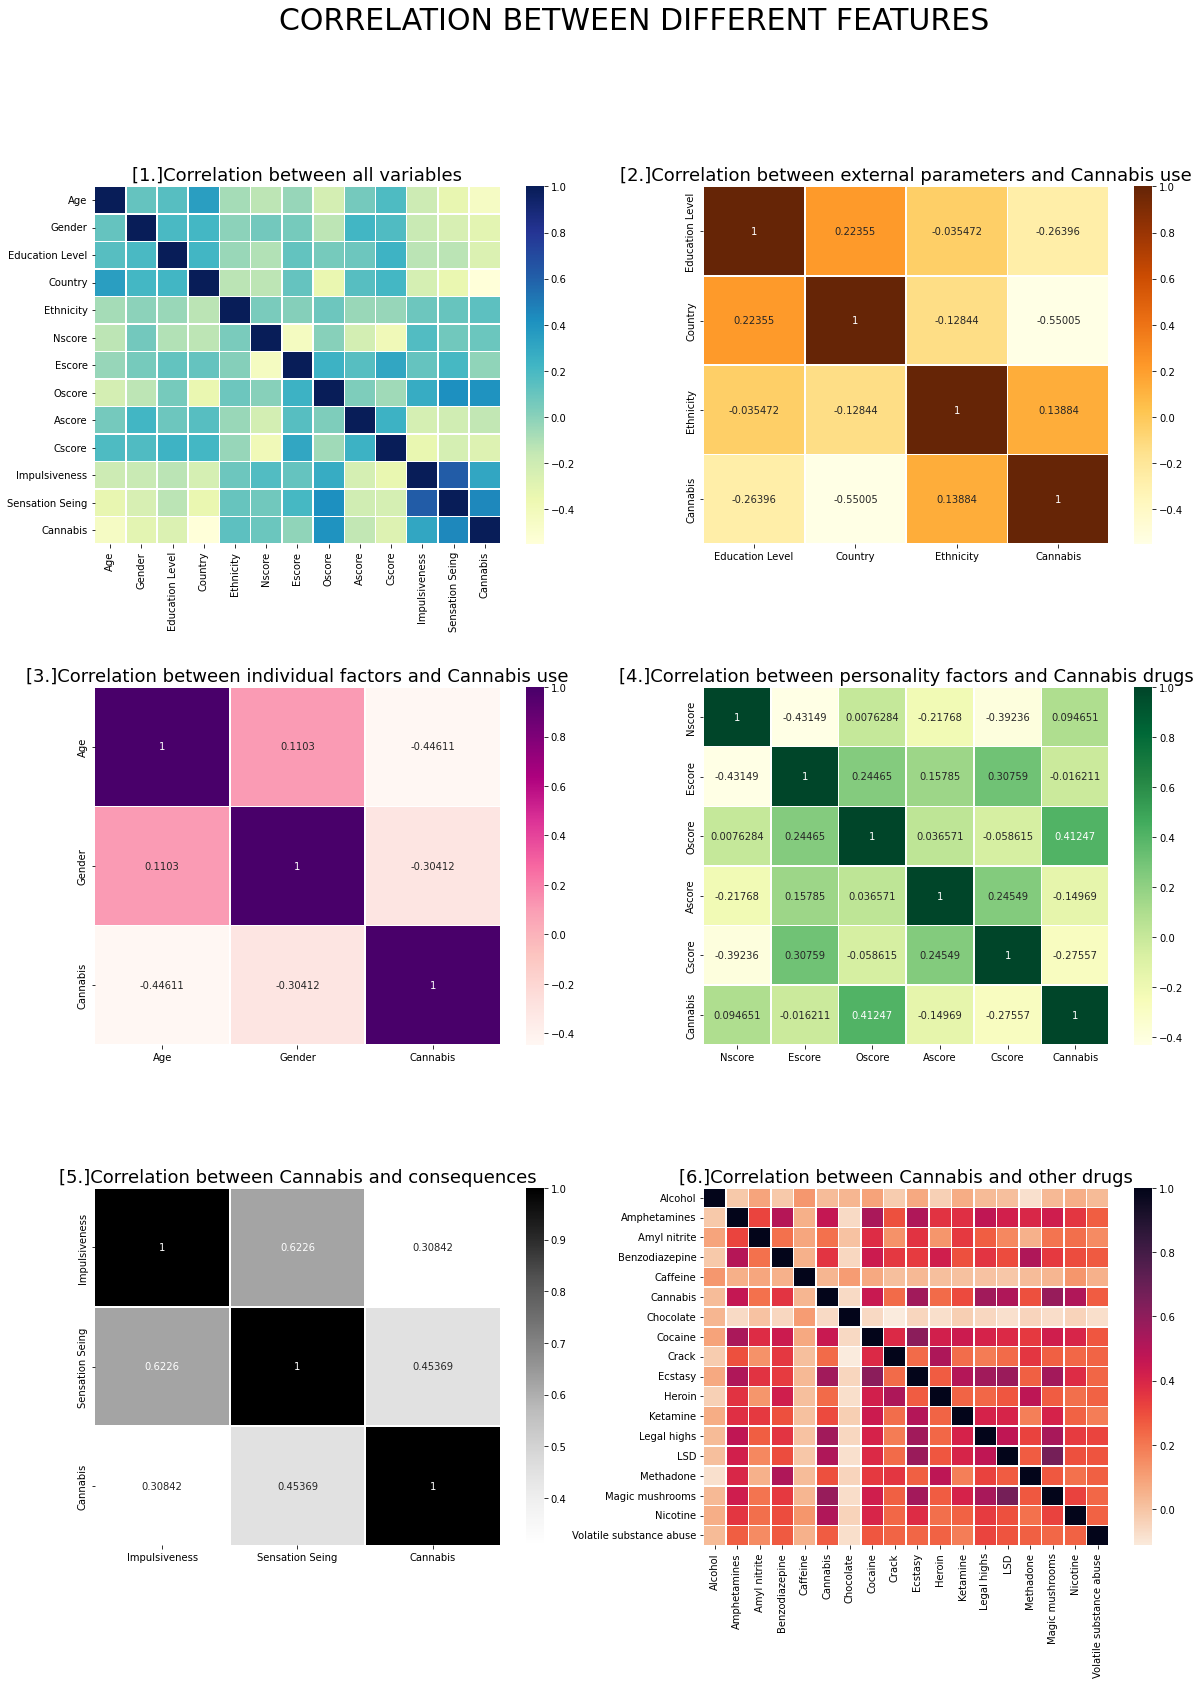

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 2, figsize=(20,25))
fig.suptitle('CORRELATION BETWEEN DIFFERENT FEATURES',fontsize=30)



#Correlation between all variables
corr_matrix = df_Cannabis.corr()
hm1 = sns.heatmap(corr_matrix,linewidths=.5,cmap="YlGnBu",fmt=".5g",ax=ax1[0],annot=False, yticklabels = df_Cannabis.columns, xticklabels = df_Cannabis.columns)
hm1.set_title("[1.]Correlation between all variables",fontsize=18)



#Correlation between external parameters and drug use
df_Cannabis_ext = df_Cannabis[["Education Level", "Country","Ethnicity","Cannabis"]]
corr_matrix_ext = df_Cannabis_ext.corr()
hm2 = sns.heatmap(corr_matrix_ext,annot=True,linewidths=.5,cmap="YlOrBr",fmt=".5g",ax=ax1[1],yticklabels = df_Cannabis_ext.columns, xticklabels = df_Cannabis_ext.columns)
hm2.set_title("[2.]Correlation between external parameters and Cannabis use",fontsize=18)



#Correlation between individual factors and drug use
df_Cannabis_indiv = df_Cannabis[["Age", "Gender","Cannabis"]]
corr_matrix_indiv = df_Cannabis_indiv.corr()
hm3 = sns.heatmap(corr_matrix_indiv,annot=True,linewidths=.5,cmap="RdPu",fmt=".5g",ax=ax2[0],yticklabels = df_Cannabis_indiv.columns, xticklabels = df_Cannabis_indiv.columns)
hm3.set_title("[3.]Correlation between individual factors and Cannabis use",fontsize=18)



#Correlation between personality factors and Cannabis drugs
df_Cannabis_pers = df_Cannabis[['Nscore','Escore', 'Oscore', 'Ascore', 'Cscore',"Cannabis"]]
corr_matrix_pers = df_Cannabis_pers.corr()
hm4 = sns.heatmap(corr_matrix_pers,annot=True,linewidths=.5,cmap="YlGn",fmt=".5g",ax=ax2[1],yticklabels = df_Cannabis_pers.columns, xticklabels = df_Cannabis_pers.columns)
hm4.set_title("[4.]Correlation between personality factors and Cannabis drugs",fontsize=18)


#Correlation between Cannabis and consequences
df_Cannabis_cons = df_Cannabis[['Impulsiveness','Sensation Seing',"Cannabis"]]
corr_matrix_cons = df_Cannabis_cons.corr()
hm4 = sns.heatmap(corr_matrix_cons,annot=True,linewidths=.5,cmap="Greys",fmt=".5g",ax=ax3[0],yticklabels = df_Cannabis_cons.columns, xticklabels = df_Cannabis_cons.columns)
hm4.set_title("[5.]Correlation between Cannabis and consequences",fontsize=18)



#Correlation between Cannabis and other drugs
df_Cannabis_mix = df[drugs]
corr_matrix_mix = df_Cannabis_mix.corr()
hm4 = sns.heatmap(corr_matrix_mix,annot=False,linewidths=.5,cmap="rocket_r",fmt=".5g",ax=ax3[1],yticklabels = df_Cannabis_mix.columns, xticklabels = df_Cannabis_mix.columns)
hm4.set_title("[6.]Correlation between Cannabis and other drugs",fontsize=18)

plt.subplots_adjust(hspace=0.4)
plt.show()




# THIRD PART : MODELING

**Our problematic : How to predict drug use, and more specifically heroin use, according to different parameters (personal and environmental) ?**

## 1) Split the dataset into train data and test data

In [ ]:
# Replacing non-numeric values
df_user.replace(["Non-user","User"],[0,1],inplace=True)

In [ ]:
# "data" becomes our dataset containing Cannabis users and non-users according to all other parameters.
data=df_user.copy()
data.drop(drugs,axis=1, inplace=True)
data.drop(['Alcohol_user', 'Amphetamines_user', 'Amyl nitrite_user',
       'Benzodiazepine_user', 'Caffeine_user', 'Heroin_user', 'Chocolate_user', 'Cocaine_user',
       'Crack_user', 'Ecstasy_user', 'Ketamine_user', 'Legal highs_user', 'LSD_user',
       'Methadone_user', 'Magic mushrooms_user', 'Nicotine_user', 'Volatile substance abuse_user'],axis=1, inplace=True)

In [ ]:
def split(df, col):
    df = df.copy()
    
    y = df[col]
    X = df.drop(col, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test=split(data,"Cannabis_user")

## 2) Standardize the data

In [ ]:
def standardize(X_train, X_test, y_train, y_test):      
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train),index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)
    return X_train, X_test, y_train, y_test

Only filter on training data and then transform training and testing data.

fit(): used to generate training model parameters from training data

transform(): parameters generated from the fit()method, applied to the model to generate a transformed data set.

In [ ]:
X_train, X_test, y_train, y_test=standardize(X_train, X_test, y_train, y_test)

In [ ]:
print("X_train : ",X_train.shape)
print("X_test  : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test  : ",y_test.shape)

X_train :  (1256, 12)
X_test  :  (620, 12)
y_train :  (1256,)
y_test  :  (620,)


## 3) Train or fit the data using different **algorithms** and find the **best hyperparameters**


### a) Support Vector Machine Learning algorithm 

#### a.1) Train or fit the data into a model using the Support Vector Machine Learning algorithm and test it

5-fold cross validation

In [ ]:
svr = svm.SVR()
cross_val_score(svr, X_train, y_train)

#instantiation
model_SVC = SVC( kernel = 'linear', gamma = 'scale', shrinking = False,)

#training
model_SVC.fit(X_train, y_train)

#precision calculation
print(model_SVC.score(X_test, y_test))

#Prediction
prediction = model_SVC.predict(X_test)

#display of results
result = "Result : "
if prediction[0] == 0:
  result = result + "Non-User"
if prediction[0] == 1:
  result = result + "User"
print(result)

0.8403225806451613
Result : User


The algorithm predicted whether the individual was a user or not and with some accuracy (score displayed above the result)

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       288
           1       0.87      0.82      0.85       332

    accuracy                           0.84       620
   macro avg       0.84      0.84      0.84       620
weighted avg       0.84      0.84      0.84       620



#### a.2) Select the best hyperparameters of the model using GridSearch

In [ ]:
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVC(), parameters, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_, grid.best_params_)

0.7977676595206477 SVC(gamma=0.01) {'gamma': 0.01}


The best hyperparameters for this model are displayed here, along with the accuracy score, the best estimator and then the best parameters.

### b) Gradient Boosting algorithm for classification

#### b.1) Train or fit the data into a model using the Gradient Boosting algorithm and test it

In [ ]:
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

#precision calculation
print(GB.score(X_test, y_test))

#Prediction
prediction = GB.predict(X_test)

#display of results
result = "Result : "
if prediction[0] == 0:
  result = result + "Non-User"
if prediction[0] == 1:
  result = result + "User"
print(result)

0.8241935483870968
Result : User


The algorithm predicted whether the individual was a user or not and with some accuracy (score displayed above the result)

#### b.2) Select the best hyperparameters of the model using GridSearch

In [ ]:
parameters = {'loss':["deviance", "exponential"],
              'learning_rate':[0.1,0.01],
              'n_estimators':[100,200,500],             
              "max_depth":[1,2,3]}
grid = GridSearchCV(GradientBoostingClassifier(), parameters)
grid.fit(X_train,y_train)
print (grid.best_score_, grid.best_estimator_, grid.best_params_)     

0.8057326250553343 GradientBoostingClassifier() {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 100}


The best hyperparameters for this model are displayed here, along with the accuracy score, the best estimator and then the best parameters.

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       288
           1       0.84      0.83      0.83       332

    accuracy                           0.82       620
   macro avg       0.82      0.82      0.82       620
weighted avg       0.82      0.82      0.82       620



### c) XGBoost algorithm 

#### c.1) Train or fit the data into a model using the XGBoosting algorithm and test it

In [ ]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

#precision calculation
print(RFC.score(X_test, y_test))

#Prediction
prediction = RFC.predict(X_test)

#display of results
result = "Result : "
if prediction[0] == 0:
  result = result + "Non-User"
if prediction[0] == 1:
  result = result + "User"
print(result)

0.8370967741935483
Result : User


The algorithm predicted whether the individual was a user or not and with some accuracy (score displayed above the result)

#### c.2) Select the best hyperparameters of the model using GridSearch

In [ ]:
parameters = {"max_features":["sqrt","log2", None],
              'n_estimators':[100,200,500],             
              "max_depth":[None,1,2]}
grid = GridSearchCV(RandomForestClassifier(), parameters)
grid.fit(X_train,y_train)
print (grid.best_score_, grid.best_estimator_, grid.best_params_)   

0.8089261999620566 RandomForestClassifier(max_features='sqrt', n_estimators=200) {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


The best hyperparameters for this model are displayed here, along with the accuracy score, the best estimator and then the best parameters.

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       288
           1       0.85      0.85      0.85       332

    accuracy                           0.84       620
   macro avg       0.84      0.84      0.84       620
weighted avg       0.84      0.84      0.84       620



### d) Bagging Classifier algorithm

#### d.1) Train or fit the data into a model using the Bagging Classifier algorithm and test it

In [ ]:
bagging=BaggingClassifier()
bagging.fit(X_train,y_train)

#precision calculation
print(bagging.score(X_test, y_test))

#Prediction
prediction = bagging.predict(X_test)

#display of results
result = "Result : "
if prediction[0] == 0:
  result = result + "Non-User"
if prediction[0] == 1:
  result = result + "User"
print(result)

0.8290322580645161
Result : User


The algorithm predicted whether the individual was a user or not and with some accuracy (score displayed above the result)

#### d.2) Select the best hyperparameters of the model using GridSearch

In [ ]:
parameters = {'n_estimators':[100,200,500],             
              "random_state":[10,5,8]}
grid = GridSearchCV(BaggingClassifier(), parameters)
grid.fit(X_train,y_train)
print (grid.best_score_, grid.best_estimator_, grid.best_params_)   

0.7977739834313541 BaggingClassifier(n_estimators=200, random_state=10) {'n_estimators': 200, 'random_state': 10}


The best hyperparameters for this model are displayed here, along with the accuracy score, the best estimator and then the best parameters.

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       288
           1       0.88      0.79      0.83       332

    accuracy                           0.83       620
   macro avg       0.83      0.83      0.83       620
weighted avg       0.83      0.83      0.83       620



### e) Extra Trees Classifier algorithm

#### e.1) Train or fit the data into a model using the Extra Trees Classifier algorithm and test it

In [ ]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)

#precision calculation
print(ETC.score(X_test, y_test))

#Prediction
prediction = ETC.predict(X_test)

#display of results
result = "Result : "
if prediction[0] == 0:
  result = result + "Non-User"
if prediction[0] == 1:
  result = result + "User"
print(result)

0.8419354838709677
Result : User


The algorithm predicted whether the individual was a user or not and with some accuracy (score displayed above the result)

#### e.2) Select the best hyperparameters of the model using GridSearch

In [ ]:
parameters = {"criterion":["gini","entropy"],
              'n_estimators':[100,200,500],             
              "max_depth":[None,1,2],
              "max_features":["sqrt","log2",None]}
grid = GridSearchCV(ExtraTreesClassifier(), parameters)
grid.fit(X_train,y_train)
print (grid.best_score_, grid.best_estimator_, grid.best_params_)   

0.8049579459938027 ExtraTreesClassifier(criterion='entropy', max_depth=2, max_features='log2',
                     n_estimators=200) {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'n_estimators': 200}


The best hyperparameters for this model are displayed here, along with the accuracy score, the best estimator and then the best parameters.

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       288
           1       0.85      0.85      0.85       332

    accuracy                           0.84       620
   macro avg       0.84      0.84      0.84       620
weighted avg       0.84      0.84      0.84       620



## 4) Find the best model

### a) Get sklearn algorithms

In [ ]:
def get_sklearn_algorithms(verbose = False):
  
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print (" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print( e)
        if verbose: print ("="*30)
    return algos

In [ ]:
algos = get_sklearn_algorithms()
algos

defaultdict(list,
            {'covariance': [sklearn.covariance._elliptic_envelope.EllipticEnvelope,
              sklearn.covariance._empirical_covariance.EmpiricalCovariance,
              sklearn.covariance._graph_lasso.GraphicalLasso,
              sklearn.covariance._graph_lasso.GraphicalLassoCV,
              sklearn.covariance._shrunk_covariance.LedoitWolf,
              sklearn.covariance._robust_covariance.MinCovDet,
              sklearn.covariance._shrunk_covariance.OAS,
              sklearn.covariance._shrunk_covariance.ShrunkCovariance],
             'decomposition': [sklearn.decomposition._dict_learning.DictionaryLearning,
              sklearn.decomposition._factor_analysis.FactorAnalysis,
              sklearn.decomposition._fastica.FastICA,
              sklearn.decomposition._incremental_pca.IncrementalPCA,
              sklearn.decomposition._kernel_pca.KernelPCA,
              sklearn.decomposition._lda.LatentDirichletAllocation,
              sklearn.decompositio

In [ ]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print ("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print (",".join(algos_))


===> covariance
EllipticEnvelope,EmpiricalCovariance,GraphicalLasso,GraphicalLassoCV,LedoitWolf,MinCovDet,OAS,ShrunkCovariance

===> decomposition
DictionaryLearning,FactorAnalysis,FastICA,IncrementalPCA,KernelPCA,LatentDirichletAllocation,MiniBatchDictionaryLearning,MiniBatchSparsePCA,NMF,PCA,SparseCoder,SparsePCA,TruncatedSVD

===> discriminant_analysis
LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,StandardScaler

===> dummy
DummyClassifier,DummyRegressor

===> ensemble
AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier,GradientBoostingRegressor,HistGradientBoostingClassifier,HistGradientBoostingRegressor,IsolationForest,RandomForestClassifier,RandomForestRegressor,RandomTreesEmbedding,StackingClassifier,StackingRegressor,VotingClassifier,VotingRegressor

===> gaussian_process
GaussianProcessClassifier,GaussianProcessRegressor

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,

### b) Compare the performance of the different algorithms. Which is the best Model ?

#### b.1) Performance of each algorithm

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)

An object for detecting o


/usr/local/lib/python3.8/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.935080500247165 > -82.270569587794682). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.253090718962012 > -81.965527050553789). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-7.254495502475745 > -82.024892572270275). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/usr/local/lib/python3

0.4596774193548387
Maximum likelihood covari
-15.925504192272175
Sparse inverse covariance
-15.929163120714335
Sparse inverse covariance
-15.927217738465037
LedoitWolf Estimator.
-15.929227006865428
Minimum Covariance Determ


/usr/local/lib/python3.8/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-8.049820910967224 > -82.531484009566071). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.920611223364744 > -78.306716671247756). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.954832430925096 > -78.308555407844850). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(
/usr/local/lib/python3

-15.946984562852329
Oracle Approximating Shri
-15.928044651918832
Covariance estimator with
-15.949970259130655
Dictionary learning.
'DictionaryLearning' object has no attribute 'scor
Factor Analysis (FA).
-16.137659212228566
FastICA
'FastICA' object has no attribute 'score'
Incremental principal com
'IncrementalPCA' object has no attribute 'score'
Kernel Principal componen
'KernelPCA' object has no attribute 'score'
Latent Dirichlet Allocati
Negative values in data passed to LatentDirichletA
Mini-batch dictionary lea
'MiniBatchDictionaryLearning' object has no attrib
Mini-batch Sparse Princip
'MiniBatchSparsePCA' object has no attribute 'scor
Non-Negative Matrix Facto
Negative values in data passed to NMF (input X)
Principal component analy
-15.925474826043065
__init__() missing 1 required positional argument:
Sparse Principal Componen
'SparsePCA' object has no attribute 'score'
Dimensionality reduction
'TruncatedSVD' object has no attribute 'score'
Linear Discriminant Analy
0.8370967

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

0.4962802330334428
Lasso model fit with Leas
-0.0004691251083897008
Cross-validated Lasso, us
0.49619520967492947
Lasso model fit with Lars
0.496788943805068
Ordinary least squar
0.49687976612867435
Logistic Regression
0.832258064516129
Logistic Regression CV (a


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing s

0.8290322580645161
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCVCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task Lasso model tr
For mono-task outputs, use LassoCVCV
Orthogonal Matching Pursu
0.3571714490269816
Cross-validated Orthogona
0.4785447855167029
Passive Aggressive Classi
0.817741935483871
Passive Aggressive Regres
-0.5575011257652585
Linear perceptron classif
0.7564516129032258
Generalized Linear Model
0.2663628321488297
Linear regression model t


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

-0.8674698798820306
RANSAC (RANdom SAmple Con
-0.08173722667878791
Linear least squares with
0.49685274923606615
Ridge regression with bui
0.4966044715953788
Classifier using Ridge re
0.8370967741935483
Ridge classifier with bui


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


0.8370967741935483
Linear classifiers (SVM,
0.8338709677419355
Solves linear One-Class S
'SGDOneClassSVM' object has no attribute 'score'
Linear model fitted by mi
0.4977320564108524
Theil-Sen Estimator
0.49705114833277697
Generalized Linear Model
0.43536795699950703
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
'NoneType' object has no attribute 'find'
Classifier implementing t
0.8080645161290323
Regression based on k-nea
0.4384621820615795
Transform X into a (weigh
'KNeighborsTransformer' object has no attribute 's
Kernel Density Estimation
-10613.62734369509
Unsupervised Outlier Dete
'LocalOutlierFacto

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: Use

'PowerTransformer' object has no attribute 'score'
Transform features using
'QuantileTransformer' object has no attribute 'sco
Scale features using stat
'RobustScaler' object has no attribute 'score'
Generate univariate B-spl
'SplineTransformer' object has no attribute 'score
Standardize features by r
'StandardScaler' object has no attribute 'score'
Linear Support Vector Cla
0.8370967741935483
Linear Support Vector Reg
0.21103018350142588
Nu-Support Vector Classif


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8387096774193549
Nu Support Vector Regress
0.5012977260880392
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.8451612903225807
Epsilon-Support Vector Re
0.4946912474874374
'module' object is not callable
Can't instantiate abstract class BaseDecisionTree 
A decision tree classifie
0.7290322580645161
A decision tree regressor
-0.11529451137884883
An extremely randomized t
0.7387096774193549
An extremely randomized t
0.014390896921017249


In [ ]:
# Performance of each algorithm
performances

{'An object for detecting o': [0.4596774193548387],
 'Linear Discriminant Analy': [0.8370967741935483],
 'Quadratic Discriminant An': [0.8306451612903226],
 'DummyClassifier makes pre': [0.535483870967742],
 'An AdaBoost classifier.': [0.8225806451612904],
 'An AdaBoost regressor.': [0.4689269755845006],
 'A Bagging classifier.': [0.8193548387096774],
 'A Bagging regressor.': [0.44183400267737605],
 'An extra-trees class': [0.8354838709677419],
 'An extra-trees regre': [0.5094253890562248],
 'Gradient Boosting for cla': [0.8241935483870968],
 'Gradient Boosting for reg': [0.491856817614161],
 'Histogram-based Gradient': [0.47289506746309107],
 'A random forest clas': [0.8370967741935483],
 'A random forest regr': [0.5195628974230253],
 'Gaussian process classifi': [0.8387096774193549],
 'Gaussian process regressi': [0.022974126358151215],
 'Bayesian ARD regression.': [0.49590739817111784],
 'Bayesian ridge regression': [0.495918203382517],
 'Elastic Net model with it': [0.4962462136888

In [ ]:
# Performance is manipulated via panda
df_perf = pd.DataFrame(performances).T
col_name = "performance"
df_perf.columns = [col_name]
df_perf=df_perf.performance.sort_values(ascending=False)
df_perf

C-Support Vector Classifi    0.845161
Gaussian process classifi    0.838710
Nu-Support Vector Classif    0.838710
Ridge classifier with bui    0.837097
Linear Support Vector Cla    0.837097
A random forest clas         0.837097
Classifier using Ridge re    0.837097
Linear Discriminant Analy    0.837097
An extra-trees class         0.835484
Linear classifiers (SVM,     0.833871
Logistic Regression          0.832258
Quadratic Discriminant An    0.830645
Logistic Regression CV (a    0.829032
Gradient Boosting for cla    0.824194
An AdaBoost classifier.      0.822581
A Bagging classifier.        0.819355
Passive Aggressive Classi    0.817742
Nearest centroid classifi    0.812903
Classifier implementing t    0.808065
Linear perceptron classif    0.756452
A decision tree classifie    0.729032
DummyClassifier makes pre    0.535484
A random forest regr         0.519563
An extra-trees regre         0.509425
Nu Support Vector Regress    0.501298
Linear regression model t    0.500759
Linear model

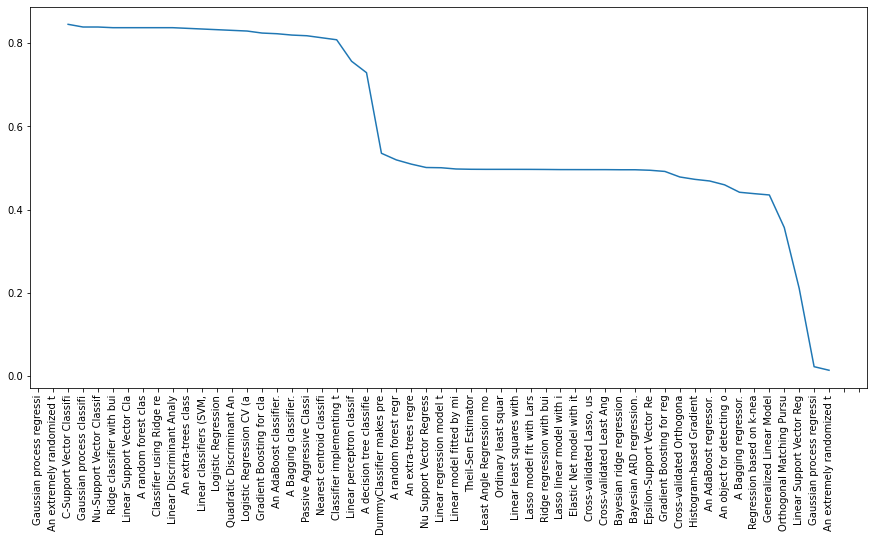

In [ ]:
# Trace performance by algo
fig , axes = plt.subplots(1,1)
fig.set_size_inches(15,7)
df
axes.xaxis.set_ticklabels(df_perf.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df_perf.plot(rot=90, ax=axes)

#### b.2) Best performance (and best model)

In [ ]:
# Best model
best_algorithm, best_perf

(SVC(), 0.8451612903225807)

The best algorithm with the best performance is displayed here.

#### b.3) Confusion matrix

In [ ]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='OrRd_r');
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non user', 'user']); ax.yaxis.set_ticklabels(['non user', 'user'])

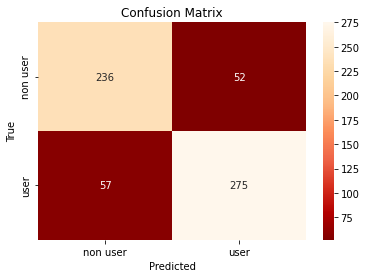

In [ ]:
#The Gradient Boosting algorithm is most often our best model on this dataset
#So we want to visualize the confusion matrix for this algorithm
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
plot_confusion_matrix(y_test, ypred)



*   Diagonal with a direction from top left to bottom right: well predicted 
*   Other diagonal: poorly predicted individuals

## 6) Which scoring function ?

### a) The score functions are retrieved

In [ ]:
def get_sklearn_score_functions(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions named as 'score'.
    
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ score_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print (dir(sklearn))
    for nom_module in dir(sklearn):    
        if verbose : print (nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if "score" in nom_fonction:
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print (e)
        if verbose: print ("="*30)
    return algos

In [ ]:
scoring_modules = get_sklearn_score_functions(False)
scoring_modules.keys()

dict_keys(['metrics', 'model_selection'])

### b) Retrieving metrics

In [ ]:
# We are interested in the metrics
scoring_modules["metrics"]

[<module 'sklearn.metrics._scorer' from '/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py'>,
 <function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics.cluster._supervised.adjusted_mutual_info_score(labels_true, labels_pred, *, average_method='arithmetic')>,
 <function sklearn.metrics.cluster._supervised.adjusted_rand_score(labels_true, labels_pred)>,
 <function sklearn.metrics._ranking.average_precision_score(y_true, y_score, *, average='macro', pos_label=1, sample_weight=None)>,
 <function sklearn.metrics._classification.balanced_accuracy_score(y_true, y_pred, *, sample_weight=None, adjusted=False)>,
 <function sklearn.metrics._classification.brier_score_loss(y_true, y_prob, *, sample_weight=None, pos_label=None)>,
 <function sklearn.metrics.cluster._unsupervised.calinski_harabasz_score(X, labels)>,
 <function sklearn.metrics._classification.cohen_kappa_score(y1, y2, *, labels=None, we

### c) We test the metrics on an algorithm

In [ ]:
performances = {}
for i in range(10):
    algorithme = GradientBoostingClassifier()
    algorithme.fit(X_train, y_train)
    performance = algorithme.score(X_test, y_test)
    print (i, performance)
    performances[i] = [performance]

0 0.8241935483870968
1 0.8241935483870968
2 0.8241935483870968
3 0.8241935483870968
4 0.8241935483870968
5 0.8241935483870968
6 0.8241935483870968
7 0.8241935483870968
8 0.8241935483870968
9 0.8241935483870968


### d) Various metrics can be calculated

In [ ]:
y_pred = algorithme.predict(X_test)

In [ ]:
score_par_metric = {}
for scoring_function in scoring_modules["metrics"]:
    try:
        info         = str(scoring_function)
        nom_metrique = info[info.find(" "):info.find(" at ")].strip()
        score_algo   = scoring_function(y_test, y_pred)
        score_par_metric[nom_metrique] =  [score_algo]
        print (nom_metrique, " => ", score_algo)
    except:
        pass

accuracy_score  =>  0.8241935483870968
adjusted_mutual_info_score  =>  0.3275888917826101
adjusted_rand_score  =>  0.4194680353636597
average_precision_score  =>  0.7893407874674878
balanced_accuracy_score  =>  0.8241089357429718
brier_score_loss  =>  0.17580645161290323
cohen_kappa_score  =>  0.6471755246945807
completeness_score  =>  0.3280550955777487
d2_tweedie_score  =>  0.2932145247657294
explained_variance_score  =>  0.2937269912985274
f1_score  =>  0.8340943683409437
fowlkes_mallows_score  =>  0.7103376891164969
homogeneity_score  =>  0.3286959872597433
jaccard_score  =>  0.7154046997389034
mutual_info_score  =>  0.22700627504422177
normalized_mutual_info_score  =>  0.32837522871111685
precision_recall_fscore_support  =>  (array([0.80338983, 0.84307692]), array([0.82291667, 0.8253012 ]), array([0.81303602, 0.83409437]), array([288, 332]))
precision_score  =>  0.8430769230769231
r2_score  =>  0.2932145247657294
rand_score  =>  0.7097347438636719
recall_score  =>  0.8253012048192

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:1748: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


In [ ]:
# Placed in a pandas dataframe
df_metriques = pd.DataFrame.from_dict(score_par_metric).T
df_metriques.index
colonne_de_score = "score"
df_metriques.columns = [colonne_de_score]
df_metriques.drop("precision_recall_fscore_support", inplace=True)
df_metriques.sort_values(by="score",ascending=False)

# CONCLUSION

In conclusion, an attempt was made to predict whether an individual is a cannabis user or not, according to different criteria.   

Our classification algorithms succeed in making this prediction with a performance very often around 0.8.    

It is not always the same algorithm that is the best. However, we know how to find the best hyperparameters so that each of these algorithms is the best possible.